In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def show_image(image, cmap = None, fig_size = (10, 10)):
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(image, cmap = cmap)
    ax.axis('off')
    plt.show()

## 2. Kernels

### 2.1 Constructing a Kernel
OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image. As an example, we will try an averaging filter on an image.

In [ ]:
img = cv2.imread('../img/tictactoe.png')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

### 2.2 Structual Elements (Kernel Shapes)
In some cases, you may need elliptical/circular shaped kernels. So for this purpose, OpenCV has a function, cv2.getStructuringElement(). You just pass the shape and size of the kernel, you get the desired kernel.

In [ ]:
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

In [ ]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

In [ ]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

## 3. Smoothing Kernels
Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (e.g: noise, edges) from the image resulting in edges being blurred when this is filter is applied. (Well, there are blurring techniques which do not blur edges). OpenCV provides mainly four types of blurring techniques.

### 3.1 Average Blurring
This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average.

In [ ]:
image = cv2.imread('../img/bricks.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

kernelSizes = [(3, 3), (9, 9), (15, 15)]
 
# loop over the kernel sizes and apply an "average" blur to the image
for i, (kX, kY) in enumerate(kernelSizes):
    blurred = cv2.blur(gray, (kX, kY))
    plt.subplot(2,2,i+2),plt.imshow(blurred, cmap = 'gray')
    plt.title(f"Average ({kX}, {kY})"), plt.xticks([]), plt.yticks([])
    
plt.show()

### 3.2 Gaussian Blurring
In this approach, instead of a box filter consisting of equal filter coefficients, a Gaussian kernel is used.

In [ ]:
image = cv2.imread('../img/bricks.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

kernelSizes = [(3, 3), (9, 9), (15, 15)]
 
# loop over the kernel sizes and apply an "average" blur to the image
for i, (kX, kY) in enumerate(kernelSizes):
    blurred = cv2.GaussianBlur(gray, (kX, kY), 0)
    plt.subplot(2,2,i+2),plt.imshow(blurred, cmap = 'gray')
    plt.title(f"Gaussian ({kX}, {kY})"), plt.xticks([]), plt.yticks([])### 3.3 Median Blurring

### 3.3 Median Blurring
Here, the function `cv2.medianBlur()` computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. This is highly effective in removing salt-and-pepper noise. Median blur method has been most effective when removing salt-and-pepper noise. unlike average blurring and Gaussian blurring where the kernel size could be rectangular, the kernel size for the median must be square.

In [ ]:
image = cv2.imread('../img/bricks.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

kernel_sizes = [3, 9, 15]
 
# loop over the kernel sizes and apply an "average" blur to the image
for i, k in enumerate(kernel_sizes):
    blurred = cv2.medianBlur(gray, k)
    plt.subplot(2,2,i+2),plt.imshow(blurred, cmap = 'gray')
    plt.title(f"Median ({k})"), plt.xticks([]), plt.yticks([])

plt.show()

### 3.4 Bi-lateral Blurring
In order to reduce noise while still maintaining edges, we can use bilateral blurring. bilateral blurring accomplishes this by introducing two Gaussian distributions. The first Gaussian function only considers spatial neighbors.  That is, pixels that appear close together in the (x, y)-coordinate space of the image. The second Gaussian then models the pixel intensity  of the neighborhood, ensuring that only pixels with similar intensity are included in the actual computation of the blur.

This method is able to preserve edges of an image,  while still reducing noise. The largest downside to this method is  that it is considerably slower than its averaging, Gaussian, and median blurring counterparts.

In [ ]:
image = cv2.imread('../img/bricks.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

params = [(11, 21, 7), (11, 41, 21), (11, 61, 39)]

# loop over the diameter, sigma color, and sigma space
for i, (diameter, sigma_colour, sigma_space) in enumerate(params):
    blurred = cv2.bilateralFilter(gray, diameter, sigma_colour, sigma_space)
    plt.subplot(2,2,i+2),plt.imshow(blurred, cmap = 'gray')
    plt.title(f"Blurred d={diameter}, sc={sigma_colour}, ss={sigma_space}"), plt.xticks([]), plt.yticks([])

plt.show()

## 4. Morphological Transformations

### 4.1 Erosion
The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white)

In [ ]:
image = cv2.imread('../img/tictactoe.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

# apply a series of erosions
for i in range(0, 3):
    eroded = cv2.erode(gray.copy(), None, iterations=i + 1)
    plt.subplot(2,2,i+2),plt.imshow(eroded, cmap = 'gray')
    plt.title(f'Eroded {i + 1} times'), plt.xticks([]), plt.yticks([])

plt.show()

### 4.2 Dilation
It is just opposite of erosion. Here, a pixel element is ‘1’ if atleast one pixel under the kernel is ‘1’. So it increases the white region in the image or size of foreground object increases.

In [ ]:
image = cv2.imread('../img/tictactoe.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

# apply a series of dilations
for i in range(0, 3):
    dilated = cv2.dilate(gray.copy(), None, iterations=i + 1)
    plt.subplot(2,2,i+2),plt.imshow(dilated, cmap = 'gray')
    plt.title(f'Dilated {i + 1} times'), plt.xticks([]), plt.yticks([])

plt.show()

### 4.3 Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise

In [ ]:
image = cv2.imread('../img/snowy_i.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

kernel_sizes = [(1, 1), (3, 3), (5, 5)]
 
# loop over the kernels and apply an "opening" operation to the image
for i, kernel_size in enumerate(kernel_sizes):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
    plt.subplot(2,2,i+2),plt.imshow(opening, cmap = 'gray')
    plt.title(f"Opening: ({kernel_size[0]}, {kernel_size[1]})"), plt.xticks([]), plt.yticks([])

plt.show()

### 4.4 Closing
Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

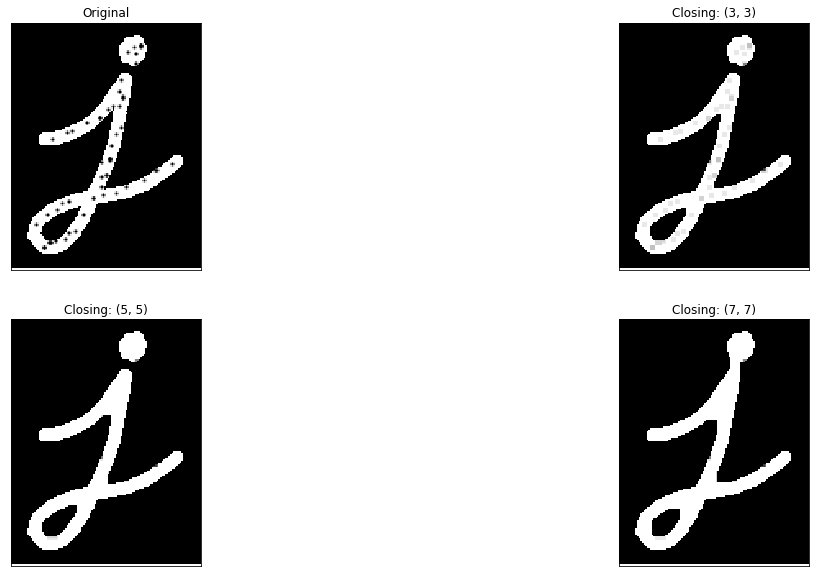

In [33]:
image = cv2.imread('../img/dotted_i.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

kernel_sizes = [(3, 3), (5, 5), (7, 7)]
 
# loop over the kernels and apply an "opening" operation to the image
for i, kernel_size in enumerate(kernel_sizes):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
    plt.subplot(2,2,i+2),plt.imshow(closing, cmap = 'gray')
    plt.title(f"Closing: ({kernel_size[0]}, {kernel_size[1]})"), plt.xticks([]), plt.yticks([])

plt.show()

### 4.5 Morphological Gradient
It is the difference between dilation and erosion of an image.
The result will look like the outline of the object.

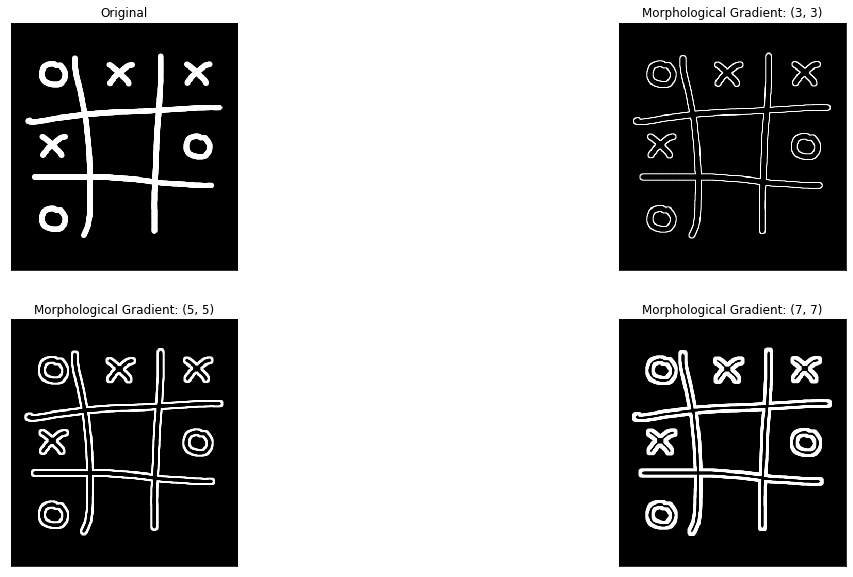

In [32]:
image = cv2.imread('../img/tictactoe.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

kernel_sizes = [(3, 3), (5, 5), (7, 7)]

# loop over the kernels and apply a "Morphological gradient" operation to the image
for i, kernel_size in enumerate(kernel_sizes):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
    plt.subplot(2,2,i+2),plt.imshow(gradient, cmap = 'gray')
    plt.title(f"Morphological Gradient: ({kernel_size[0]}, {kernel_size[1]})"), plt.xticks([]), plt.yticks([])

plt.show()

### 4.6 Top/White Hat

It is the difference between the closing of the input image and input image. A top hat operation is used to reveal bright regions of an image on dark backgrounds.

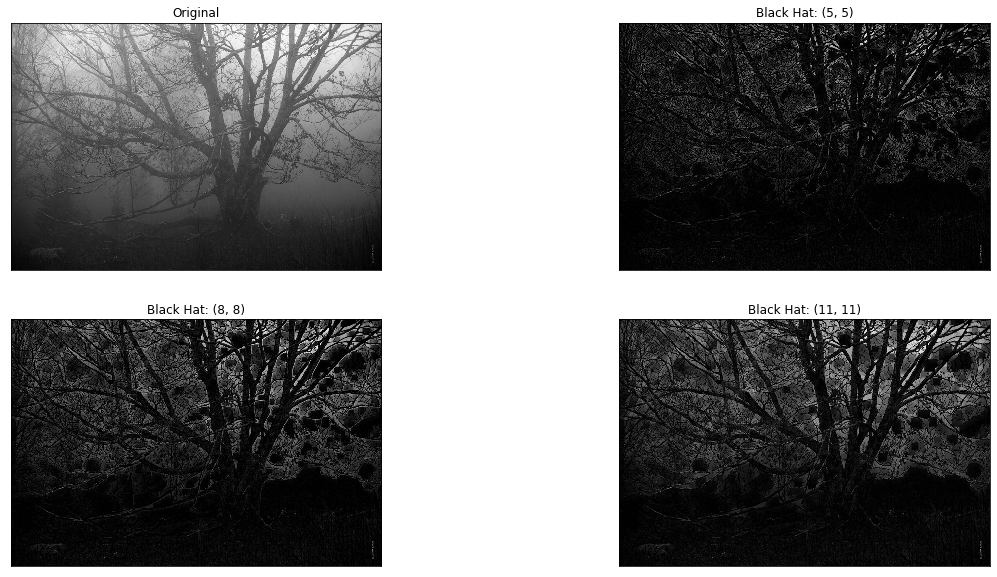

In [27]:
image = cv2.imread('../img/tree.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

kernel_sizes = [(5, 5), (8, 8), (11, 11)]

# loop over the kernels and apply a "closing" operation to the image
for i, kernel_size in enumerate(kernel_sizes):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    black_hat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)
    plt.subplot(2,2,i+2),plt.imshow(black_hat, cmap = 'gray')
    plt.title(f"Black Hat: ({kernel_size[0]}, {kernel_size[1]})"), plt.xticks([]), plt.yticks([])

plt.show()

### 4.7 Black Hat

It is the difference between input image and Opening of the image. A Black hat operation is used to reveal dark regions of an image on bright backgrounds.
For example, in the licence plate image below, we can (almost always) rely on is that the license plate text itself being darker than the license plate background. 

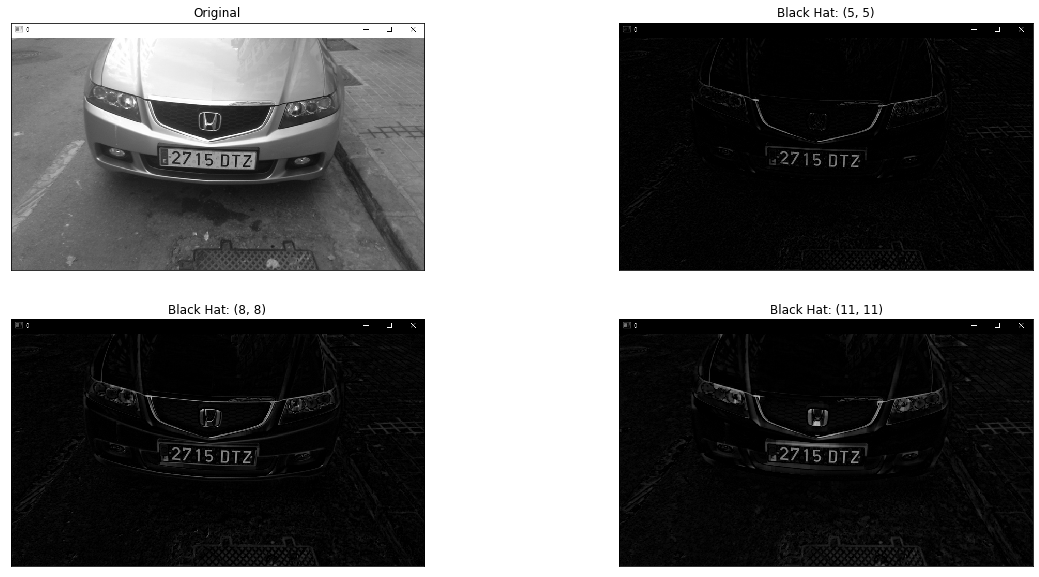

In [25]:
image = cv2.imread('../img/licence_plate_raw.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(gray, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

kernel_sizes = [(5, 5), (8, 8), (11, 11)]

# loop over the kernels and apply a "closing" operation to the image
for i, kernel_size in enumerate(kernel_sizes):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    white_hat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
    plt.subplot(2,2,i+2),plt.imshow(white_hat, cmap = 'gray')
    plt.title(f"Black Hat: ({kernel_size[0]}, {kernel_size[1]})"), plt.xticks([]), plt.yticks([])

plt.show()

### EXERCISE: Use different types of structuring Elements when performing opening, closing, white and black hat operations. 
What do you notice? Why is that?

In [ ]:
# TODO: Your Code Below